# 로드킬근거자료19-23

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False


In [2]:
# ✅ 1단계: 데이터프레임으로 읽고 간단히 출력하기

import pandas as pd

base_path = './data/로드킬근거자료19-23/'

# 파일 경로
file_권역 = base_path + '로드킬_권역별_통계.csv'
file_도로유형 = base_path + '로드킬_도로유형별_통계.csv'
file_종별 = base_path + '로드킬_종별_통계.csv'

# 인코딩해서 읽기
df_권역 = pd.read_csv(file_권역, encoding='utf-8')
df_도로유형 = pd.read_csv(file_도로유형, encoding='utf-8')
df_종별 = pd.read_csv(file_종별, encoding='utf-8')


# 각각 상위 5개 출력
print("📌 [권역별 통계]")
print(df_권역.head(), "\n")

print("📌 [도로유형별 통계]")
print(df_도로유형.head(), "\n")

print("📌 [종별 통계]")
print(df_종별.head())



📌 [권역별 통계]
  구 분 2019년 2020년  2021년  2022년  2023년
0  서울     7     6      5  1,007  1,576
1  부산    39    29  5,001  3,142  2,869
2  대구    89    76     63  1,825  2,965
3  인천    10    54  1,490  2,122  2,607
4  광주     5    11  1,744  1,314  2,131 

📌 [도로유형별 통계]
      구 분   2019년   2020년   2021년   2022년   2023년
0      국도  17,502  11,924  13,604  20,883  28,780
1    고속도로   1,866   1,584   1,194   1,265   1,045
2     지방도   1,230     906   3,710   7,494   6,439
3  시·군·구도     716     689  16,715  30,711  38,432
4   기타 도로      83       4   2,038   3,636   4,582 

📌 [종별 통계]
     구 분     고라니    너구리  멧돼지   노루  오소리      개     고양이      기타
0  2019년  11,638  1,731  315  557  141  1,016   4,661   1,338
1  2020년   6,864  1,415  134  610  136    654   3,008   2,286
2  2021년  10,847  2,291  124  872  245  1,605  17,527   3,750
3  2022년  16,075  3,353  136  967  376  2,257  31,880   8,945
4  2023년  18,267  4,011  192  968  510  2,575  38,143  14,612


In [4]:
print(df_권역.shape)
print(df_권역.columns.tolist())
print(df_권역.info())


(18, 6)
['구 분', '2019년', '2020년', '2021년', '2022년', '2023년']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구 분     18 non-null     object
 1   2019년   18 non-null     object
 2   2020년   18 non-null     object
 3   2021년   18 non-null     object
 4   2022년   18 non-null     object
 5   2023년   18 non-null     object
dtypes: object(6)
memory usage: 996.0+ bytes
None


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 파일 경로 (네 로컬 경로 그대로 유지)
file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_권역별_통계.csv'

# 데이터 불러오기
df = pd.read_csv(file_path, encoding='utf-8')
df = df[df['구 분'] != '합계'].copy()

# 문자열 숫자 변환
for col in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# 인덱스 설정
df.set_index('구 분', inplace=True)

# 지역 그룹핑
group_map = {
    '서울': '수도권', '인천': '수도권', '경기': '수도권',
    '대전': '충청권', '세종': '충청권', '충북': '충청권', '충남': '충청권',
    '광주': '전라권', '전북': '전라권', '전남': '전라권',
    '강원': '기타권', '제주': '기타권',
    '경북': '경상권', '경남': '경상권', '울산': '경상권', '부산': '경상권', '대구': '경상권'
}
df['지역권역'] = df.index.map(group_map)

# 색상: 파스텔톤
pastel_colors = plt.cm.Pastel2.colors

# 시각화: 권역별 subplot
grouped = df.groupby('지역권역')
fig, axs = plt.subplots(len(grouped), 1, figsize=(14, 14), sharex=True)

for ax, (region, data) in zip(axs, grouped):
    plot_data = data.drop(columns='지역권역').T
    bars = plot_data.plot(kind='bar', ax=ax, color=pastel_colors, legend=False)

    # 숫자 라벨 표시
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='{:,.0f}', fontsize=8)

    ax.set_title(f'[{region}] 각 권역 연도별 로드킬 건수', fontsize=13)
    ax.set_ylabel('건수')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7)
    ax.legend(title='지역', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xlabel('연도')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_권역별_통계.csv'

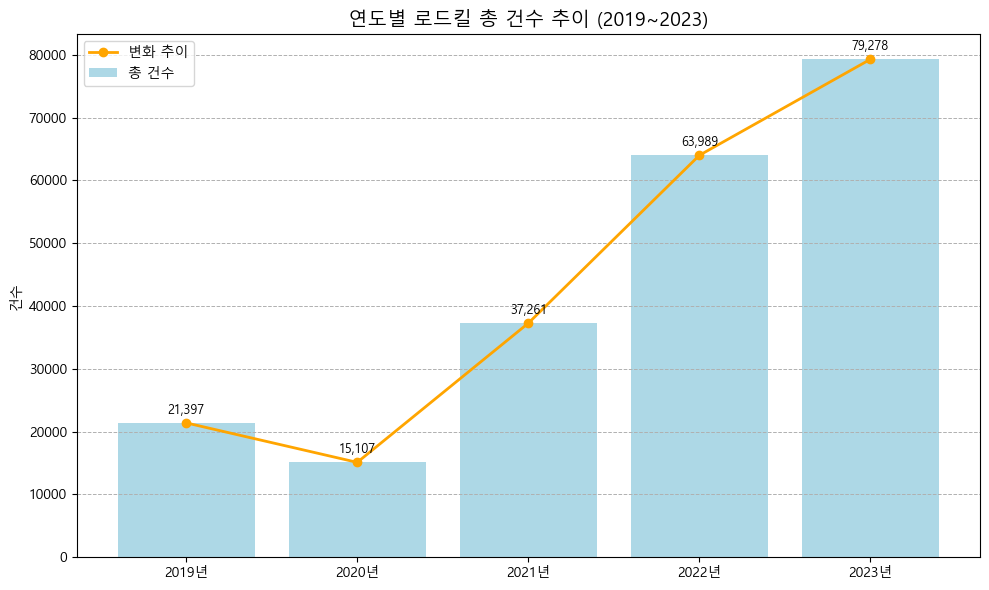

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# ✅ 연도별 합계 직접 입력 (이미 정리된 데이터 기준)
years = ['2019년', '2020년', '2021년', '2022년', '2023년']
totals = [21397, 15107, 37261, 63989, 79278]

# ✅ 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대차트
bars = ax1.bar(years, totals, color='lightblue', label='총 건수')

# 라인차트 (꺾은선)
ax1.plot(years, totals, color='orange', marker='o', linewidth=2, label='변화 추이')

# 막대 위 숫자 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 1000, f"{height:,}", 
             ha='center', va='bottom', fontsize=9)

# 제목 및 기타 설정
plt.title('연도별 로드킬 총 건수 추이 (2019~2023)', fontsize=14)
plt.ylabel('건수')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# 도교공사고유형별(19-23)

In [17]:
import pandas as pd

base_path = './data/도교공사고유형별(19-23)/'

df_2019 = pd.read_csv(base_path + '도로교통공단_사고유형별_교통사고(2019).csv', encoding='cp949')
df_2020 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2020).csv', encoding='cp949')
df_2021 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2021).csv', encoding='cp949')
df_2022 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2022).csv', encoding='cp949')
df_2023 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2023).csv', encoding='cp949')

print(df_2019.head())


  사고유형_대분류    사고유형_중분류   사고건수  사망자수  중상자수   경상자수  부상신고자수
0     차대사람         횡단중  18101   652  8943   8812     822
1     차대사람       차도통행중   4765   180  1944   2527     293
2     차대사람  길가장자리구역통행중   2705    41   816   1734     226
3     차대사람       보도통행중   2335    37   899   1398     170
4     차대사람          기타  18244   361  6258  11010    1554


In [32]:
# 연도별 총 사고 수 
# 2. 사본 만들고 필요한 컬럼만 추출
df_2019_acc = df_2019[['사고건수']].copy()
df_2019_acc['연도'] = 2019

df_2020_acc = df_2020[['사고건수']].copy()
df_2020_acc['연도'] = 2020

df_2021_acc = df_2021[['사고건수']].copy()
df_2021_acc['연도'] = 2021

df_2022_acc = df_2022[['사고건수']].copy()
df_2022_acc['연도'] = 2022

df_2023_acc = df_2023[['사고건수']].copy()
df_2023_acc['연도'] = 2023

# 3. 병합
all_acc = pd.concat([df_2019_acc, df_2020_acc, df_2021_acc, df_2022_acc, df_2023_acc], ignore_index=True)

# 4. 연도별 합계
yearly_total = all_acc.groupby('연도')['사고건수'].sum().to_frame()
yearly_total.index.name = '연도'  # 인덱스 이름 설정 (선택적)
# 결과 확인
print(yearly_total)

        사고건수
연도          
2019  229600
2020  209654
2021  203130
2022  196836
2023  198296


In [24]:
df_2019.rename(columns={'사고유형_대분류': '사고유형대분류'}, inplace=True)
df_2019.rename(columns={'사고유형_중분류': '사고유형중분류'}, inplace=True)

# 차량단독 사고만 필터링 + 연도 컬럼 추가
df_2019_car = df_2019[df_2019['사고유형대분류'] == '차량단독'].copy()
df_2019_car['연도'] = 2019

df_2020_car = df_2020[df_2020['사고유형대분류'] == '차량단독'].copy()
df_2020_car['연도'] = 2020

df_2021_car = df_2021[df_2021['사고유형대분류'] == '차량단독'].copy()
df_2021_car['연도'] = 2021

df_2022_car = df_2022[df_2022['사고유형대분류'] == '차량단독'].copy()
df_2022_car['연도'] = 2022

df_2023_car = df_2023[df_2023['사고유형대분류'] == '차량단독'].copy()
df_2023_car['연도'] = 2023

# 병합
vehicle_solo_df = pd.concat([
    df_2019_car,
    df_2020_car,
    df_2021_car,
    df_2022_car,
    df_2023_car
], axis=0)

# 불필요한 열 제거
vehicle_solo_df.drop(columns=['사고유형', '사망자수', '중상자수', '경상자수', '부상신고자수'], inplace=True)

# ✅ 연도를 인덱스로 설정
vehicle_solo_df.set_index('연도', inplace=True)

# 확인
print(vehicle_solo_df)





     사고유형대분류    사고유형중분류  사고건수
연도                           
2019    차량단독      공작물충돌  3586
2019    차량단독       도로이탈   643
2019    차량단독  주/정차차량 충돌    45
2019    차량단독         기타  4509
2019    차량단독         전도  1141
2019    차량단독         전복   190
2020    차량단독         전도  1108
2020    차량단독         전복   178
2020    차량단독      공작물충돌  3233
2020    차량단독  주/정차차량 충돌    19
2020    차량단독       도로이탈   413
2020    차량단독       도로이탈   199
2020    차량단독         기타  3728
2021    차량단독         전도   956
2021    차량단독         전복   165
2021    차량단독      공작물충돌  2742
2021    차량단독  주/정차차량 충돌    23
2021    차량단독       도로이탈   385
2021    차량단독       도로이탈   156
2021    차량단독         기타  3401
2022    차량단독         전도   972
2022    차량단독         전복   131
2022    차량단독      공작물충돌  2697
2022    차량단독  주/정차차량 충돌    35
2022    차량단독       도로이탈   360
2022    차량단독       도로이탈   165
2022    차량단독         기타  3511
2023    차량단독         전도   895
2023    차량단독         전복   130
2023    차량단독      공작물충돌  2809
2023    차량단독  주/정차차량 충돌    23
2023    차량

In [27]:
# 사고유형중분류에서 1차 사고 조건
primary_conditions = ['공작물충돌', '기타']

# 1차 사고 프레임
df_primary = vehicle_solo_df[vehicle_solo_df['사고유형중분류'].isin(primary_conditions)].copy()

# 2차 사고 프레임 (나머지)
df_secondary = vehicle_solo_df[~vehicle_solo_df['사고유형중분류'].isin(primary_conditions)].copy()

# 확인
print("✅ [1차 사고] 데이터프레임:")
print(df_primary)

print("\n✅ [2차 사고] 데이터프레임:")
print(df_secondary)

✅ [1차 사고] 데이터프레임:
     사고유형대분류 사고유형중분류  사고건수
연도                        
2019    차량단독   공작물충돌  3586
2019    차량단독      기타  4509
2020    차량단독   공작물충돌  3233
2020    차량단독      기타  3728
2021    차량단독   공작물충돌  2742
2021    차량단독      기타  3401
2022    차량단독   공작물충돌  2697
2022    차량단독      기타  3511
2023    차량단독   공작물충돌  2809
2023    차량단독      기타  4026

✅ [2차 사고] 데이터프레임:
     사고유형대분류    사고유형중분류  사고건수
연도                           
2019    차량단독       도로이탈   643
2019    차량단독  주/정차차량 충돌    45
2019    차량단독         전도  1141
2019    차량단독         전복   190
2020    차량단독         전도  1108
2020    차량단독         전복   178
2020    차량단독  주/정차차량 충돌    19
2020    차량단독       도로이탈   413
2020    차량단독       도로이탈   199
2021    차량단독         전도   956
2021    차량단독         전복   165
2021    차량단독  주/정차차량 충돌    23
2021    차량단독       도로이탈   385
2021    차량단독       도로이탈   156
2022    차량단독         전도   972
2022    차량단독         전복   131
2022    차량단독  주/정차차량 충돌    35
2022    차량단독       도로이탈   360
2022    차량단독       도로이탈   165
2023    차

In [ ]:
# 연도별 사고건수 총합 (1차 사고)
primary_yearly_sum = df_primary.groupby(level=0)['사고건수'].sum()

# 연도별 사고건수 총합 (2차 사고)
secondary_yearly_sum = df_secondary.groupby(level=0)['사고건수'].sum()

# 확인
print(primary_yearly_sum)

print(secondary_yearly_sum)

<class 'pandas.core.series.Series'>
연도
2019    8095
2020    6961
2021    6143
2022    6208
2023    6835
Name: 사고건수, dtype: int64
연도
2019    2019
2020    1917
2021    1685
2022    1663
2023    1528
Name: 사고건수, dtype: int64


In [38]:
# 기존 Series들을 DataFrame으로 변환
primary_df = primary_yearly_sum.to_frame(name='1차사고')
secondary_df = secondary_yearly_sum.to_frame(name='2차사고')

# 연도 기준으로 병합
merged_df = yearly_total.join(primary_df, how='left').join(secondary_df, how='left')

# 결과 출력
print(merged_df)

        사고건수  1차사고  2차사고
연도                      
2019  229600  8095  2019
2020  209654  6961  1917
2021  203130  6143  1685
2022  196836  6208  1663
2023  198296  6835  1528


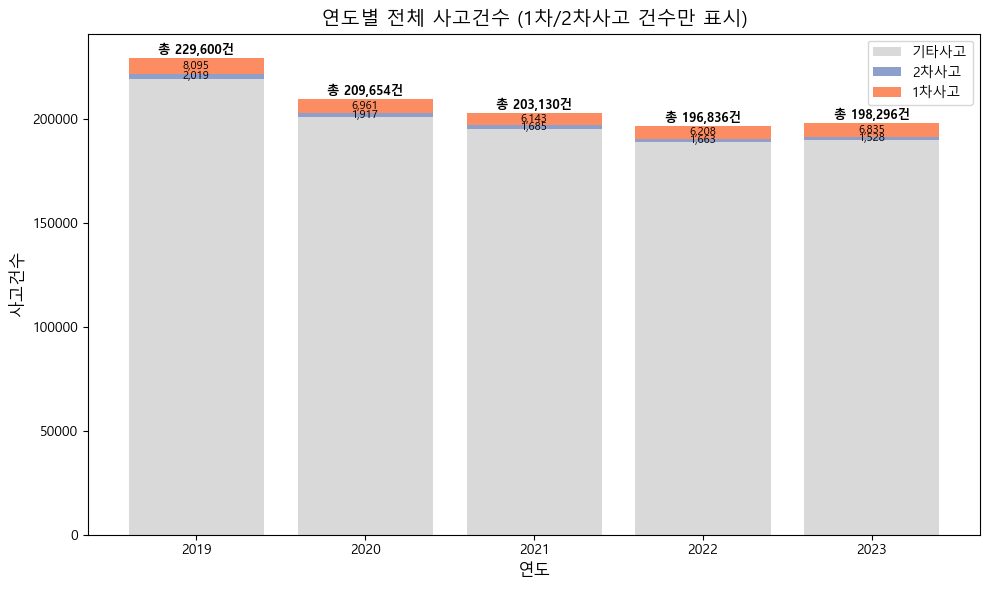

In [47]:
import matplotlib.pyplot as plt


plot_df = merged_df.copy()
plot_df['기타사고'] = plot_df['사고건수'] - plot_df['1차사고'] - plot_df['2차사고']
years = plot_df.index.astype(str)

fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그리기
ax.bar(years, plot_df['기타사고'], label='기타사고', color='#d9d9d9')
ax.bar(years, plot_df['2차사고'], bottom=plot_df['기타사고'], label='2차사고', color='#8da0cb')
ax.bar(years, plot_df['1차사고'], 
       bottom=plot_df['기타사고'] + plot_df['2차사고'], label='1차사고', color='#fc8d62')

# 텍스트 표시 (기타사고 제외)
for i, year in enumerate(years):
    기타 = plot_df.loc[int(year), '기타사고']
    이차 = plot_df.loc[int(year), '2차사고']
    일차 = plot_df.loc[int(year), '1차사고']
    
    # 2차사고 텍스트
    if 이차 > 0:
        ax.text(i, 기타 + 이차 / 2, f"{이차:,}", ha='center', va='center', fontsize=8, color='black')

    # 1차사고 텍스트
    if 일차 > 0:
        ax.text(i, 기타 + 이차 + 일차 / 2, f"{일차:,}", ha='center', va='center', fontsize=8, color='black')

    # 전체 사고건수 텍스트
    total = plot_df.loc[int(year), '사고건수']
    ax.text(i, total + 400, f"총 {total:,}건", ha='center', va='bottom', fontsize=9, fontweight='bold')

# 설정
ax.set_title('연도별 전체 사고건수 (1차/2차사고 건수만 표시)', fontsize=14)
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('사고건수', fontsize=12)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

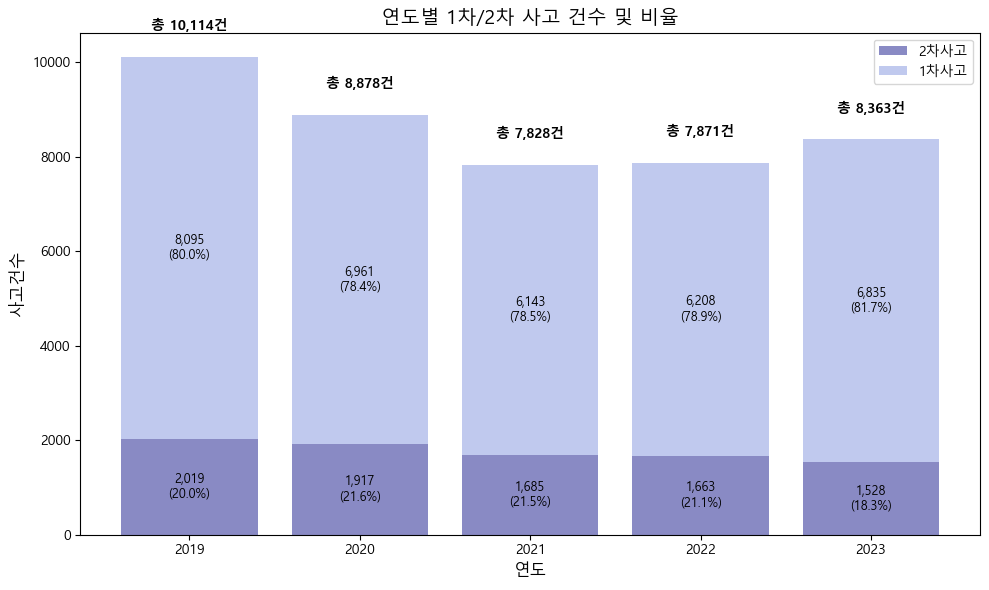

In [57]:
# 연도와 각 사고 유형 추출
years = merged_df.index.astype(str)
primary = merged_df['1차사고']
secondary = merged_df['2차사고']
total = primary + secondary

# 그래프 생성
# 최대값 기준 y축 설정 (가장 높은 값보다 약간 크게)
ymax = (total.max() + 1000)  
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 (2차사고 먼저 그리기)
bar2 = ax.bar(years, secondary, label='2차사고', color='#898AC4')
bar1 = ax.bar(years, primary, bottom=secondary, label='1차사고', color='#C0C9EE')

# 텍스트 표시 (건수 + 비율)
for i, year in enumerate(years):
    y_base = 0
    s2 = secondary.iloc[i]
    s1 = primary.iloc[i]
    tot = total.iloc[i]

    # 비율 계산
    p2_pct = s2 / tot * 100 if tot > 0 else 0
    p1_pct = s1 / tot * 100 if tot > 0 else 0

    # 2차사고 텍스트
    if s2 > 0:
        ax.text(i, y_base + s2 / 2, f"{s2:,}\n({p2_pct:.1f}%)", ha='center', va='center', fontsize=9)
    y_base += s2

    # 1차사고 텍스트
    if s1 > 0:
        ax.text(i, y_base + s1 / 2, f"{s1:,}\n({p1_pct:.1f}%)", ha='center', va='center', fontsize=9)
    y_base += s1

    # 전체 텍스트
    ax.text(i, y_base + 500, f"총 {tot:,}건", ha='center', va='bottom', fontsize=10, fontweight='bold')

# 꾸미기
ax.set_title('연도별 1차/2차 사고 건수 및 비율', fontsize=14)
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('사고건수', fontsize=12)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 보험사민원건수 19-23 & 한국도로공사_교통사고통계_20231231
